<a href="https://colab.research.google.com/github/swerchansky/optimization-methods/blob/main/1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from decimal import *
from random import random, shuffle, uniform, randint
getcontext().prec = 40

plt.rcParams["figure.figsize"] = (10, 10)

# 1 пункт

##Градиентный спуск

In [105]:
def check_points(point1, point2, eps=1e-6):
    for i in range(len(point1)):
      if abs(point1[i] - point2[i]) > eps:
        return True
    return False

def gradient_descent(lr, x, grad_f):
    points = [x]
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

##Визуализация градиентного спуска и функции

In [106]:
def draw_3d_function(left_limit, right_Limit, points, azim, dist, elev, function):
    t = np.linspace(left_limit, right_Limit, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    my_col = cm.cool(function(X, Y)/np.amax(function(X, Y))) # color of surface
    ax.plot_surface(X, Y, function(X, Y), facecolors = my_col,
                    alpha=0.8, rstride=12, cstride=12, zorder=1) # draw function surface
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    Z = [function(p[0], p[1]) for p in points]
    ax.plot(X, Y, Z,'.', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    ax.plot(X, Y, Z, linewidth=0.5, color='salmon', zorder=4) # draw lines beetwen dots
    ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    plt.show()
  
def draw_lines_of_level(points, function):
    t = np.linspace(-50, 50, 1000)
    X, Y = np.meshgrid(t, t)
    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    plt.plot([p[0] for p in points], [p[1] for p in points], linewidth=0.5, color='salmon', zorder=4) # draw lines beetwen dots
    plt.plot(points[0][0], points[0][1], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    plt.plot(points[-1][0], points[-1][1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    plt.contour(X, Y, function(X, Y), levels=np.unique(sorted([function(p[0], p[1]) for p in points])))

# 2 пункт


## Метод дихотомии

Пусть задана функция $f(x):\;[a,\;b]\to\mathbb{R},\;f(x)\in\mathrm{C}([a,\;b])$.

Разобьём мысленно заданный отрезок пополам и возьмём две симметричные относительно центра точки $x_1$ и $x_2$ так, что:
\begin{array}{ccc}
x_1 &=& \frac{a+b}{2}-\delta,\\
x_2 &=& \frac{a+b}{2}+\delta,
\end{array}
где $\delta$ — некоторое число в интервале $\left(0,\;\frac{b-a}{2}\right)$.

Вычислим два значения функции $f(x)$ в двух новых точках. Сравнением определим в какой из двух новых точек значение функции $f(x)$ максимально.
Отбросим тот из концов изначального отрезка, к которому точка с максимальным значением функции оказалась ближе (напомним, мы ищем минимум), то есть:
* Если $f(x_1)>f(x_2)$, то берётся отрезок $[x_1,\;b]$, а отрезок $[a,\;x_1]$ отбрасывается.
* Иначе берётся зеркальный относительно середины отрезок $[a,\;x_2]$, а отбрасывается $[x_2,\;b]$.

Процедура повторяется, пока не будет достигнута заданная точность, к примеру, пока длина отрезка не достигнет удвоенного значения заданной погрешности.

In [107]:
def dichotomy_method(function, x, grad, eps=1e-9):
    gradient = np.array(grad(x[0], x[1]))
    a, b = 0, 100
    while abs(b - a) > eps:
        d = (b - a) / 2
        alpha1, alpha2 = a + d / 2, b - d / 2
        x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
        if function(x1[0], x1[1]) < function(x2[0], x2[1]):
            b = alpha2
        else:
            a = alpha1
    return (a + b) / 2

count = 0

def gradient_descent_with_dichotomy(f, x, grad_f, eps=1e-6):
    points = [x]
    lr = dichotomy_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = dichotomy_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

## Метод золотого сечения

Пусть задана функция $f(x):\;[a,\;b]\to\mathbb{R},\;f(x)\in\mathrm{C}([a,\;b])$. Тогда для того, чтобы найти неопределённое значение этой функции на заданном отрезке, отвечающее критерию поиска (пусть это будет минимум), рассматриваемый отрезок делится в пропорции золотого сечения в обоих направлениях, то есть выбираются две точки $x_1$ и $x_2$ такие, что: 
$\frac{b-a}{b-x_1}=\frac{b-a}{x_2-a}=\Phi=\frac{1+\sqrt{5}}{2}=1.618\ldots$, где $\Phi$ — пропорция золотого сечения.

Таким образом:
$\begin{array}{ccc}
x_1 &=& b-\frac{(b-a)}{\Phi}\\
x_2 &=& a+\frac{(b-a)}{\Phi}
\end{array}$

То есть точка $x_1$ делит отрезок $[a,\;x_2]$ в отношении золотого сечения. Аналогично $x_2$ делит отрезок $[x_1,\;b]$ в той же пропорции. Это свойство и используется для построения итеративного процесса.<br>

Шаг 1:<br>
Определяем границы поиска $l$ и $r$, затем устанавливаем текущее разбиение:<br>
$x_1 = l + \dfrac{r - l}{\varphi + 1}$<br>
$x_2 = r - \dfrac{r - l}{\varphi + 1}$<br>
и вычислим функцию на них: $f_1 = f(x_1), f_2 = f(x_2)$<br><br>

Шаг 2:<br>
если $f_1 < f_2$, тогда<br>
$r = x_2$<br>
$x_2 = x_1, f_2 = f_1$<br>
$x_1 = l + \dfrac{r - l}{\varphi + 1},\; f_1 = f(x_1)$<br>
иначе:<br>
$l = x_1$<br>
$x_1 = x_2, f_1 = f_2$<br>
$x_2 = r - \dfrac{r - l}{\varphi + 1},\; f_2 = f(x_2)$<br><br>

Шаг 3:<br>
если точность $|r - l| < \varepsilon$ нас устраивает, тогда останавливаемся, и искомая точка $x = \dfrac{l + r}{2}$, иначе назад к шагу 2

In [108]:
def golden_ratio_method(function, x, grad, eps=1e-9):
    gradient = np.array(grad(x[0], x[1]))
    a, b = 0, 100
    fi = (1 + 5 ** 0.5) / 2
    alpha1, alpha2 = b - (b - a) / fi, a + (b - a) / fi
    x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
    f1, f2 = function(x1[0], x1[1]), function(x2[0], x2[1])
    while abs(b - a) > eps:
        if f1 < f2:
          b = alpha2
          alpha2 = alpha1
          x2 = x1
          f2 = f1
          alpha1 = b - (b - a) / fi
          x1 = x - alpha1 * gradient
          f1 = function(x1[0], x1[1])
        else:
          a = alpha1
          alpha1 = alpha2
          x1 = x2
          f1 = f2
          alpha2 = a + (b - a) / fi
          x2 = x - alpha2 * gradient
          f2 = function(x2[0], x2[1])
    return (a + b) / 2

def gradient_descent_with_golden_ratio(f, x, grad_f):
    points = [x]
    lr = golden_ratio_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = golden_ratio_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)
    return points

## Метод чисел фибоначчи

In [109]:
def fibonacci(n):
    a = 1
    b = 1
    if n == 1:
        return b
    else:
        g = a
        for i in range(1, n):
            c = a + b
            g = a
            a = b
            b = c
        return [g, a, b]

def fibonacci_method(function, x, grad, iter_number=50):
    gradient = np.array(grad(x[0], x[1]))
    a, b = 0, 100
    fib = fibonacci(iter_number)
    fib3, fib2, fib1 = fib[-3], fib[-2], fib[-1]
    alpha1, alpha2 = a + (b - a) * (fib3/fib1), a + (b - a) * (fib2/fib1)
    x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
    f1, f2 = function(x1[0], x1[1]), function(x2[0], x2[1])
    for _ in range(iter_number):
        if f1 < f2:
          b = alpha2
          alpha2 = alpha1
          x2 = x1
          f2 = f1
          alpha1 = a + (b - alpha2)
          x1 = x - alpha1 * gradient
          f1 = (function(x1[0], x1[1]))
        else:
          a = alpha1
          alpha1 = alpha2
          x1 = x2
          f1 = f2
          alpha2 = b - (alpha1 - a)
          x2 = x - alpha2 * gradient
          f2 = function(x2[0], x2[1])
    return (a + b) / 2

def gradient_descent_with_fibonacci(f, x, grad_f):
    points = [x]
    lr = fibonacci_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = fibonacci_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

# 3 пункт

##Функция №1
$f(x,y) = x^2+y^2-x+y+5$

In [110]:
def f(x, y):
    return x ** 2 + y ** 2 - x + y + 5


def grad(x, y):
    return [2 * x - 1, 2 * y + 1]


### обычный градиентный спуск

[ 0.49999962 -0.50000037]


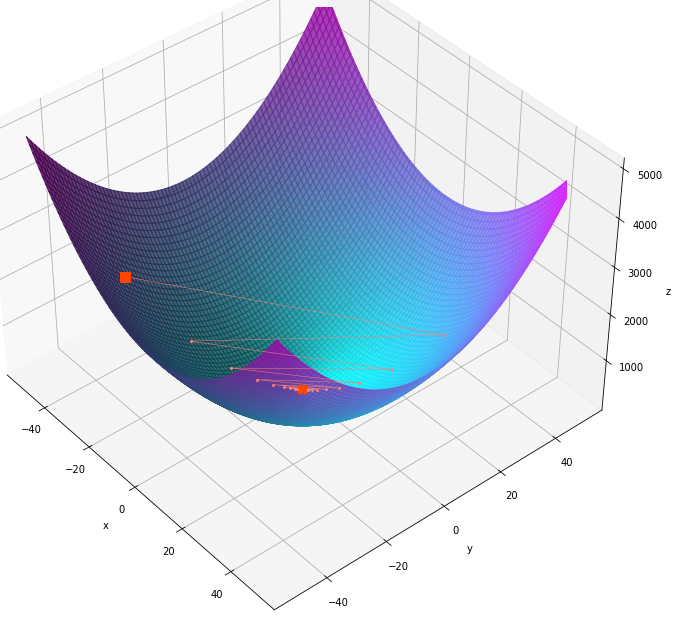

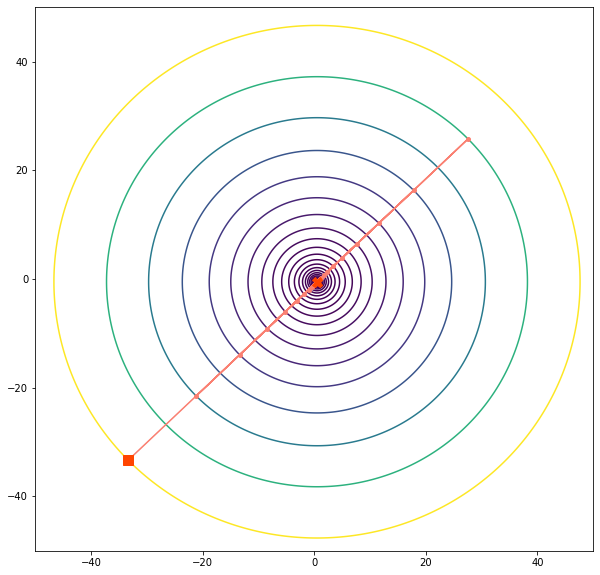

In [111]:
lr = 0.9
x = [-100/3, -100/3]

points = gradient_descent(lr, x, grad)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 8, 40, f)
draw_lines_of_level(points, f)

### градиентный спус с дихотомией

[ 0.50000002 -0.49999998]


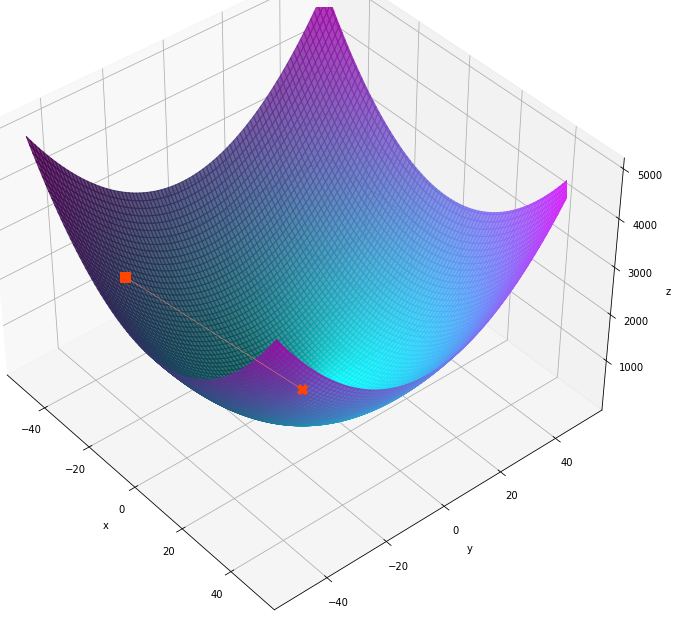

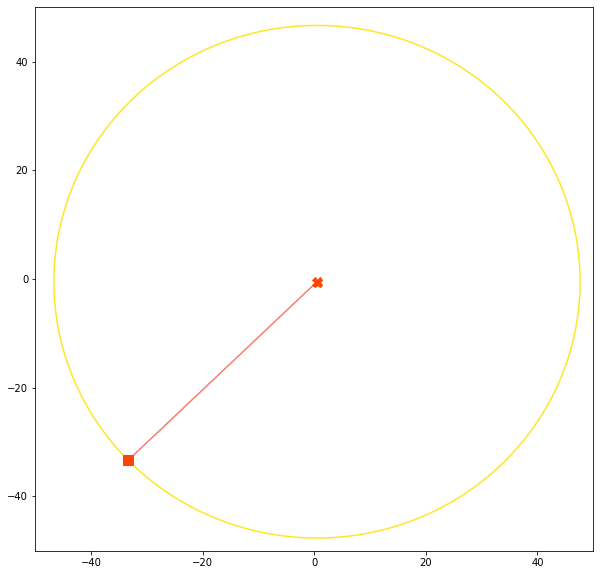

In [112]:
x = [-100/3, -100/3]

points = gradient_descent_with_dichotomy(f, x, grad)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 8, 40, f)
draw_lines_of_level(points, f)

##Функция №2
$f(x,y) = \frac{xy}{100}+\frac{y^2}{100}+\frac{x^2}{100}$

In [113]:
def f2(x, y):
    return x * y /100 + (y ** 2) / 100 + (x ** 2) / 100

def grad2(x, y):
    return [(2 * x + y) / 100, 2 * (x + 2 * y) / 100]

### обычный градиентный спуск

[-1.41738780e-05  1.03759988e-05]


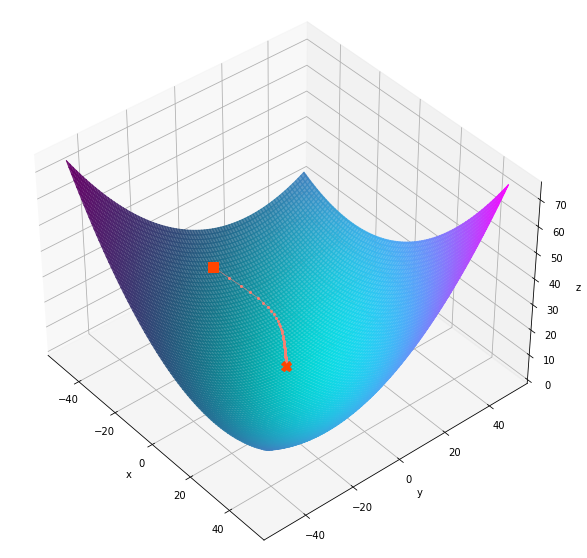

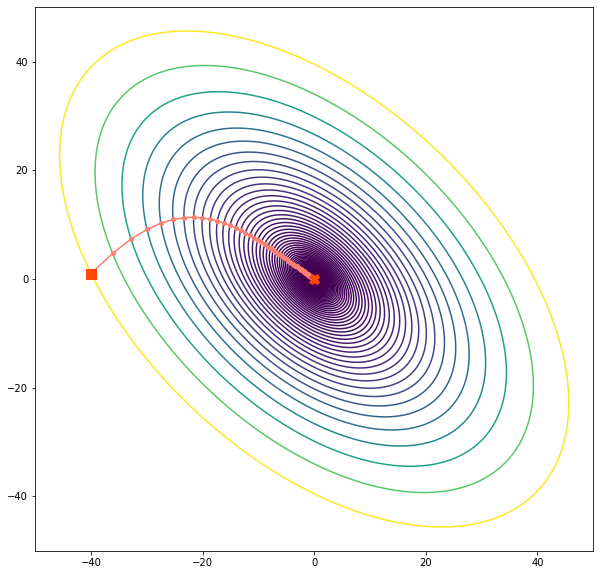

In [114]:
lr = 4.9
x = [-40, 1]

points = gradient_descent(lr, x, grad2)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 10, 40, f2)
draw_lines_of_level(points, f2)

### градиентный спуск с золотым сечением

[-4.80454158e-07  4.86693853e-07]


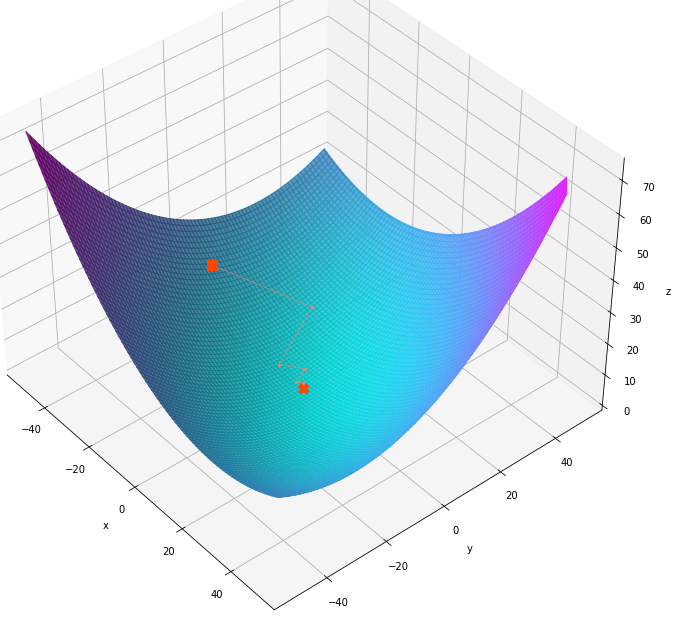

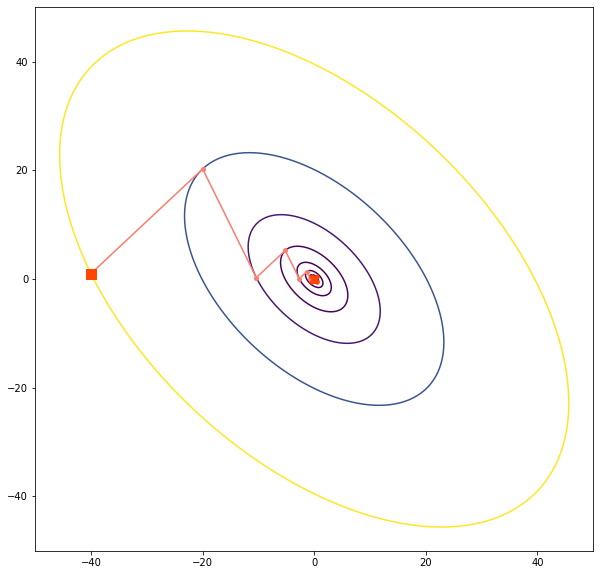

In [115]:
x = [-40, 1]

points = gradient_descent_with_golden_ratio(f2, x, grad2)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 8, 40, f2)
draw_lines_of_level(points, f2)

##Функция №3
$f(x, y) = x^2+2xy+3y^2$

In [116]:
def f3(x, y):
    return x**2 + 2*x*y + 3*y**2


def grad3(x, y):
    return [2 * x + 2*y, 2*x + 6*y]

### обычный градиентный спуск

[-4.87159851e-06  2.01788217e-06]


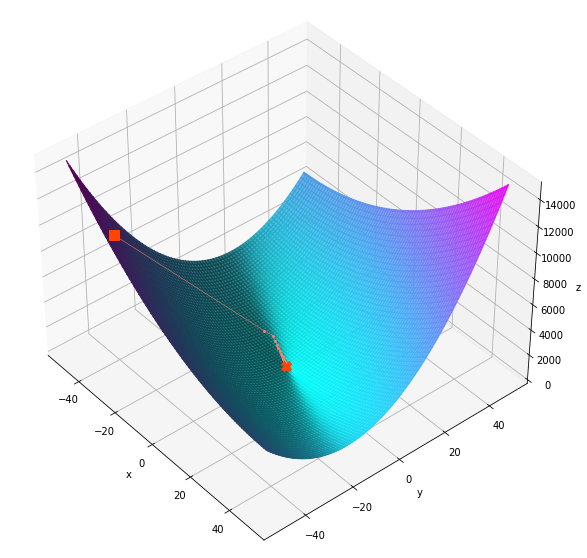

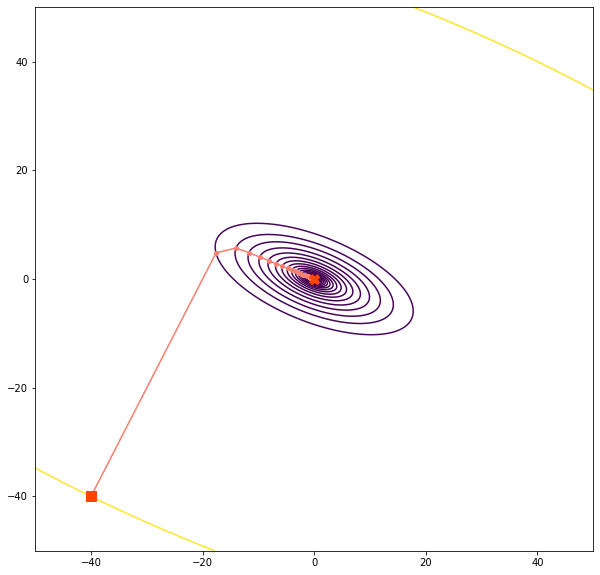

In [ ]:
lr = 0.14
x = [-40, -40]

points = gradient_descent(lr, x, grad3)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 10, 40, f3)
draw_lines_of_level(points, f3)

### градиентный спуск с методом фибоначчи

In [ ]:
x = [-40, -40]

points = gradient_descent_with_fibonacci(f3, x, grad3)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 8, 40, f3)
draw_lines_of_level(points, f3)

# 5 пункт

## Генерация функции от n переменных с числом обусловленности k

In [ ]:
def generate_function(n, k):
  diagonal = []
  min = random() * ((n ** 2) / 31)
  max = k * min
  diagonal.append(max)
  diagonal.append(min)
  for i in range(2, n):
    diagonal.append(uniform(min, max))
  shuffle(diagonal)
  return diagonal

def random_function(x, diagonal):
  sum = 0
  for i in range(len(diagonal)):
    sum += x[i] * x[i] * diagonal[i]
  return sum

## Генерация градиента функции от n переменных с числом обусловленности k

In [ ]:
def grad_random_function(x, diagonal):
  grad = [0] * len(x)
  for i in range(len(x)):
    grad[i] = 2 * diagonal[i] * x[i]
  return grad

# 6 пункт

### <для тестов>

In [ ]:
def draw_3d_random_function(left_limit, right_Limit, points, azim, dist, elev, function, diag):
    t = np.linspace(left_limit, right_Limit, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    my_col = cm.cool(function([X, Y], diag)/np.amax(function([X, Y], diag))) # color of surface
    ax.plot_surface(X, Y, function([X, Y], diag), facecolors = my_col,
                    alpha=0.8, rstride=12, cstride=12, zorder=1) # draw function surface
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    Z = [function([p[0], p[1]], diag) for p in points]
    ax.plot(X, Y, Z,'.', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    ax.plot(X, Y, Z, linewidth=0.5, color='salmon', zorder=4) # draw lines beetwen dots
    ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    plt.show()

## Градиентный спуск на основе золотого сечения для многомерного случая

In [ ]:
def golden_ratio_method_random_function(function, x, grad, diag, eps=1e-7):
    gradient = np.array(grad(x, diag))
    a, b = 0, 10000000000
    fi = (1 + 5 ** 0.5) / 2
    alpha1, alpha2 = b - (b - a) / fi, a + (b - a) / fi
    x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
    f1, f2 = function(x1, diag), function(x2, diag)
    while abs(b - a) > eps:
        if f1 < f2:
          b = alpha2
          alpha2 = alpha1
          x2 = x1
          f2 = f1
          alpha1 = b - (b - a) / fi
          x1 = x - alpha1 * gradient
          f1 = function(x1, diag)
        else:
          a = alpha1
          alpha1 = alpha2
          x1 = x2
          f1 = f2
          alpha2 = a + (b - a) / fi
          x2 = x - alpha2 * gradient
          f2 = function(x2, diag)
    return (a + b) / 2

count = 0

def gradient_descent_with_golden_ratio_random_function(f, x, grad_f, diag):
    global count
    points = [x]
    lr = golden_ratio_method_random_function(f, x, grad_f, diag)
    x = x - lr * np.array(grad_f(x, diag))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = golden_ratio_method_random_function(f, x, grad_f, diag)
        x = x - lr * np.array(grad_f(x, diag))
        points.append(x)
        count += 1

    return points

### тестинг

In [ ]:
x = [-40, -40]

diag = generate_function(2, 100)
points = gradient_descent_with_golden_ratio_random_function(random_function, x, grad_random_function, diag)

print(points[-1])
draw_3d_random_function(-50, 50, points, -40, 10, 40, random_function, diag)

## зависимость числа итераций T(n, k), необходимых градиентному спуску для сходимости от размерности пространства $n$ и числа обусловленности $k$ целевой функции

In [ ]:
count = 0

result = [[0 for _ in range(20)] for _ in range(20)]

step = 50

for iter in range(0, 4):
  for n in range(2, 1000, step):
    print(n)
    for k in range(1, 1000, step):
      x = [-40 for _ in range(n)]
      diag = generate_function(n, k)
      gradient_descent_with_golden_ratio_random_function(random_function, x, grad_random_function, diag)
      result[19 - (n//step)][k//step] += count
      count = 0

for i in range(len(result)):
  for j in range(len(result)):
    result[i][j] = result[i][j] / step

plt.rcParams["figure.figsize"] = (25, 25)
fig, ax = plt.subplots()
im = ax.imshow(result, cmap="cool")
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5)

dots = [i for i in range(2, 1000, step)]

ax.set_xticks(np.arange(len(dots)), labels=dots)
dots.reverse()
ax.set_yticks(np.arange(len(dots)), labels=dots)
result = np.array(result)
for i in range(len(result)):
    for j in range(len(result)):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center")

plt.xlabel('k')
plt.ylabel('n')


print(count)

# доп задание

## Одномерный поиск с учетом условий Вольфе

In [ ]:
def first_condition(f, x, grad, alpha, c1):
  x1 = x - alpha * np.array(grad(x[0], x[1]))
  if f(x1[0], x1[1]) <= f(x[0], x[1]) + c1 * alpha * np.dot(np.array(grad(x[0], x[1])), -np.array(grad(x[0], x[1]))):
    return True
  else:
    return False

def second_condition(f, x, grad, alpha, c2):
  x1 = x - alpha * np.array(grad(x[0], x[1]))
  if np.dot(np.array(grad(x1[0], x1[1])), -np.array(grad(x[0], x[1]))) >= c2 * np.dot(np.array(grad(x[0], x[1])), -np.array(grad(x[0], x[1]))):
    return True
  else:
    return False

def wolfe_method(f, x, grad, c1=1e-4, c2=0.9):
    alpha = 100
    while not first_condition(f, x, grad, alpha, c1) or not second_condition(f, x, grad, alpha, c2):
      alpha = alpha * 0.9
    return alpha

## Градиентный спуск на основе одномерного поиска с учетом условий Вольфе

In [ ]:
def gradient_descent_with_wolfe(f, x, grad_f):
    points = [x]
    lr = wolfe_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = wolfe_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

## тест

In [ ]:
x = [-40, -40]
points = gradient_descent_with_wolfe(f3, x, grad3)
print(points[-1])
draw_3d_function(-50, 50, points, -40, 8, 40, f3)
draw_lines_of_level(points, f3)